<a href="https://colab.research.google.com/github/DomiMM/-DomiMM--Genetic-Algorithm-Considering-Earth-Curvature/blob/main/Genetic_Algorithm_Considering_Earth_Curvature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generation: 1 -- Population size: 300 -- Best Fitness: 87041.92 km
Generation: 2 -- Population size: 180 -- Best Fitness: 87041.92 km
Generation: 3 -- Population size: 120 -- Best Fitness: 89186.08 km
Generation: 4 -- Population size: 90 -- Best Fitness: 91278.76 km
Generation: 5 -- Population size: 75 -- Best Fitness: 99283.21 km
Generation: 6 -- Population size: 67 -- Best Fitness: 99221.99 km
Generation: 7 -- Population size: 63 -- Best Fitness: 94638.81 km
Generation: 8 -- Population size: 61 -- Best Fitness: 89485.25 km
Generation: 9 -- Population size: 60 -- Best Fitness: 94638.81 km
Generation: 10 -- Population size: 60 -- Best Fitness: 89987.41 km
Generation: 11 -- Population size: 60 -- Best Fitness: 84390.67 km
Generation: 12 -- Population size: 60 -- Best Fitness: 84390.67 km
Generation: 13 -- Population size: 60 -- Best Fitness: 72572.22 km
Generation: 14 -- Population size: 60 -- Best Fitness: 62455.0 km
Generation: 15 -- Population size: 60 -- Best Fitness: 62455.0 km
Gen

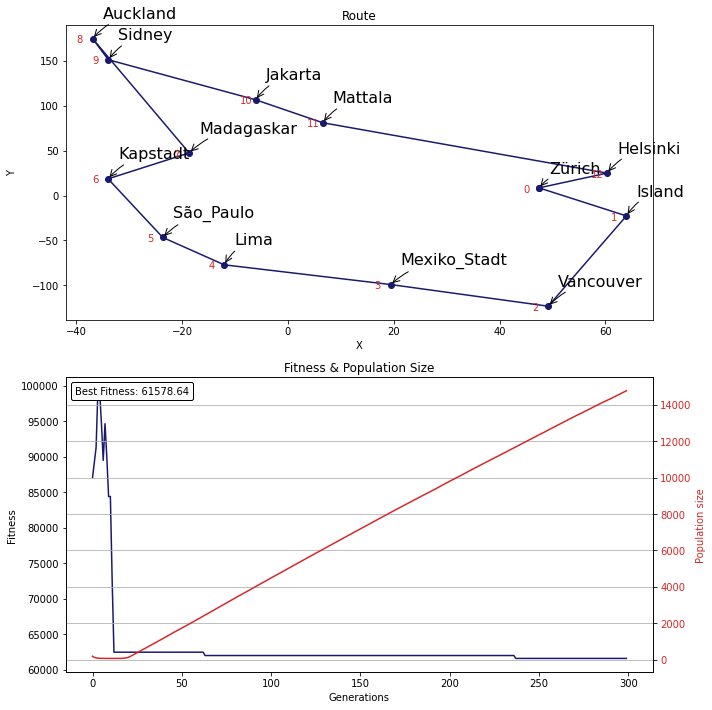

Execution time: 8.933176755905151 seconds


In [ ]:
import math
import random
import time
from typing import List

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy
from geopy import distance
from matplotlib.offsetbox import AnchoredText

# get the start time
st = time.time()

# Zeroth index is start and end point
# Flughäfen (Flughafen Zürich, Helsinki, Flughafen Keflavík Island, Jorge Chavez internationalen Flughafen Lima in Peru, Flughafen São Paulo-Congonhas Argentiniuen, Flughafen Mexiko-Stadt Mexiko City, Flughafen VancouverFlughafen Kapstadt, Madagaskar, Mattala international airport Sri Lanka, Flughafen Soekarno-Hatta Jakarta Indonesien, Kingsford Smith International Airport Australien, Flughafen Auckland)
Zürich = [47.46200691539635, 8.553357844213735]
Helsinki = [60.31608714792074, 24.971787851771417]
Lima = [-12.017557915414576, -77.11224191978624]
São_Paulo = [-23.62508276405987, -46.656512760718094]
Mexiko_Stadt = [19.43712820007146, -99.07233749958618]
Vancouver = [49.20066045937561, -123.18064574424652]
Kapstadt = [-33.96394607194974, 18.60260712025836]
Madagaskar = [-18.640040491578862, 47.44447393977876]
Mattala_Sri_Lanka = [6.591422688905723, 81.06520186965234]
Jakarta_Indonesien = [-6.089822244213903, 106.64988242805524]
Sidney = [-33.90807696815365, 151.1841204447634]
Auckland = [-36.90417881187182, 174.79383305762505]
Island = [63.978603, -22.635036]

CITY_COORDINATES = [Zürich, Helsinki, Lima, São_Paulo, Mexiko_Stadt,
                    Vancouver, Kapstadt, Madagaskar, Mattala_Sri_Lanka, Jakarta_Indonesien, Sidney, Auckland, Island]

TOTAL_CHROMOSOME = len(CITY_COORDINATES) - 1

POPULATION_SIZE = 300  # Minimum population size 100
MAX_GENERATION = 300
MUTATION_RATE = 0.10
WEAKNESS_THRESHOLD = 65000


class Genome():
    def __init__(self):
        self.chromosome = []
        self.fitness = 0

    def __str__(self):
        return "Chromosome: {0} Fitness: {1}\n".format(self.chromosome, self.fitness)

    def __repr__(self):
        return str(self)


def create_genome() -> Genome:
    genome = Genome()

    genome.chromosome = random.sample(range(1, TOTAL_CHROMOSOME + 1), TOTAL_CHROMOSOME)
    genome.fitness = eval_chromosome(genome.chromosome)
    return genome

# Distanz berechnen

def distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d


def get_fittest_genome(genomes: List[Genome]) -> Genome:
    genome_fitness = [genome.fitness for genome in genomes]
    return genomes[genome_fitness.index(min(genome_fitness))]


def eval_chromosome(chromosome: List[int]) -> float:
    # Add 0 to beginning and ending of chromosome
    arr = [0] * (len(chromosome) + 2)
    arr[1:-1] = chromosome

    fitness = 0
    for i in range(len(arr) - 1):
        p1 = CITY_COORDINATES[arr[i]]
        p2 = CITY_COORDINATES[arr[i + 1]]
        fitness += distance(p1, p2)
    return numpy.round(fitness, 2)


def tournament_selection(population: List[Genome], k: int) -> List[Genome]:
    selected_genomes = random.sample(population, k)
    selected_parent = get_fittest_genome(selected_genomes)
    return selected_parent


def order_crossover(parents: List[Genome]) -> Genome:
    child_chro = [-1] * TOTAL_CHROMOSOME

    subset_length = random.randrange(2, 5)
    crossover_point = random.randrange(0, TOTAL_CHROMOSOME - subset_length)

    child_chro[crossover_point:crossover_point + subset_length] = parents[0].chromosome[
                                                                  crossover_point:crossover_point + subset_length]

    j, k = crossover_point + subset_length, crossover_point + subset_length
    while -1 in child_chro:
        if parents[1].chromosome[k] not in child_chro:
            child_chro[j] = parents[1].chromosome[k]
            j = j + 1 if (j != TOTAL_CHROMOSOME - 1) else 0

        k = k + 1 if (k != TOTAL_CHROMOSOME - 1) else 0

    child = Genome()
    child.chromosome = child_chro
    child.fitness = eval_chromosome(child.chromosome)
    return child


def scramble_mutation(genome: Genome) -> Genome:
    subset_length = random.randint(2, 6)
    start_point = random.randint(0, TOTAL_CHROMOSOME - subset_length)
    subset_index = [start_point, start_point + subset_length]

    subset = genome.chromosome[subset_index[0]:subset_index[1]]
    random.shuffle(subset)

    genome.chromosome[subset_index[0]:subset_index[1]] = subset
    genome.fitness = eval_chromosome(genome.chromosome)
    return genome


def reproduction(population: List[Genome]) -> Genome:
    parents = [tournament_selection(population, 20), random.choice(population)]

    child = order_crossover(parents)

    if random.random() < MUTATION_RATE:
        scramble_mutation(child)

    return child


def visualize(all_fittest: List[Genome], all_pop_size: List[int]):
    fig = plt.figure(tight_layout=True, figsize=(10, 10))
    gs = gridspec.GridSpec(2, 1)

    # Top grid: Route
    chromosome = [0] * (len(all_fittest[-1].chromosome) + 2)
    chromosome[1:-1] = all_fittest[-1].chromosome
    coordinates = [CITY_COORDINATES[i] for i in chromosome]
    x, y = zip(*coordinates)

    ax = fig.add_subplot(gs[0, :])
    ax.plot(x, y, color="midnightblue")
    ax.scatter(x, y, color="midnightblue")

    # Punkte benennen

    plt.annotate("Zürich",
                 xy=(Zürich), xycoords='data',
                 xytext=(+10, +15), textcoords='offset points', fontsize=16,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.2"))
    plt.annotate("Helsinki",
                 xy=(Helsinki), xycoords='data',
                 xytext=(+10, +20), textcoords='offset points', fontsize=16,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.2"))
    plt.annotate("Lima",
                 xy=(Lima), xycoords='data',
                 xytext=(+10, +20), textcoords='offset points', fontsize=16,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.2"))
    plt.annotate("São_Paulo",
                 xy=(São_Paulo), xycoords='data',
                 xytext=(+10, +20), textcoords='offset points', fontsize=16,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.2"))
    plt.annotate("Mexiko_Stadt",
                 xy=(Mexiko_Stadt), xycoords='data',
                 xytext=(+10, +20), textcoords='offset points', fontsize=16,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.2"))
    plt.annotate("Vancouver",
                 xy=(Vancouver), xycoords='data',
                 xytext=(+10, +20), textcoords='offset points', fontsize=16,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.2"))
    plt.annotate("Kapstadt",
                 xy=(Kapstadt), xycoords='data',
                 xytext=(+10, +20), textcoords='offset points', fontsize=16,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.2"))
    plt.annotate("Madagaskar",
                 xy=(Madagaskar), xycoords='data',
                 xytext=(+10, +20), textcoords='offset points', fontsize=16,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.2"))
    plt.annotate("Mattala",
                 xy=(Mattala_Sri_Lanka), xycoords='data',
                 xytext=(+10, +20), textcoords='offset points', fontsize=16,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.2"))
    plt.annotate("Jakarta",
                 xy=(Jakarta_Indonesien), xycoords='data',
                 xytext=(+10, +20), textcoords='offset points', fontsize=16,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.2"))
    plt.annotate("Sidney",
                 xy=(Sidney), xycoords='data',
                 xytext=(+10, +20), textcoords='offset points', fontsize=16,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.2"))
    plt.annotate("Auckland",
                 xy=(Auckland), xycoords='data',
                 xytext=(+10, +20), textcoords='offset points', fontsize=16,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.2"))
    plt.annotate("Island",
                 xy=(Island), xycoords='data',
                 xytext=(+10, +20), textcoords='offset points', fontsize=16,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.2"))

    for i, xy in enumerate(coordinates[:-1]):
        ax.annotate(i, xy, xytext=(-16, -4), textcoords="offset points", color="tab:red")

    ax.set_title("Route")
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    # Bottom grid: Fitness & Populations
    ax = fig.add_subplot(gs[1, :])
    all_fitness = [genome.fitness for genome in all_fittest]
    ax.plot(all_fitness, color="midnightblue")

    color = 'tab:red'
    ax2 = ax.twinx()
    ax2.set_ylabel('Population size', color=color)
    ax2.plot(all_pop_size, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    at = AnchoredText(
        "Best Fitness: {0}".format(all_fittest[-1].fitness), prop=dict(size=10),
        frameon=True, loc='upper left')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)

    ax.set_title("Fitness & Population Size")
    ax.set_ylabel("Fitness")
    ax.set_xlabel("Generations")

    fig.align_labels()
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    generation = 0

    population: List[Genome] = [create_genome() for x in range(POPULATION_SIZE)]

    all_fittest = []
    all_pop_size = []

    while generation != MAX_GENERATION:
        generation += 1
        print("Generation: {0} -- Population size: {1} -- Best Fitness: {2} km"
              .format(generation, len(population), get_fittest_genome(population).fitness))

        childs = []
        for x in range(int(POPULATION_SIZE * 0.2)):
            child = reproduction(population)
            childs.append(child)
        population.extend(childs)

        # Kill weakness genome
        for genome in population:
            if genome.fitness > WEAKNESS_THRESHOLD:
                population.remove(genome)

        all_fittest.append(get_fittest_genome(population))
        all_pop_size.append(len(population))

    visualize(all_fittest, all_pop_size)

# get end time et
et = time.time()

# calculate elapsed time & print it
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')